# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 做完特徵工程前的所有準備 (與前範例相同)

data_path = 'data_part02/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')
# df_test.head()
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [4]:
train_Y.shape

(891,)

In [5]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [6]:
## Column Age and Fare have nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Pclass    1309 non-null int64
Age       1046 non-null float64
SibSp     1309 non-null int64
Parch     1309 non-null int64
Fare      1308 non-null float64
dtypes: float64(2), int64(3)
memory usage: 61.4 KB


In [7]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

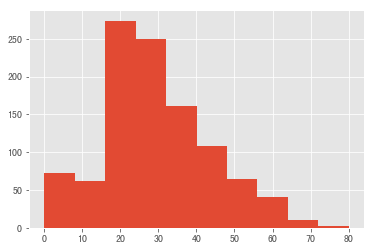

In [8]:
df.Age.hist()

In [9]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

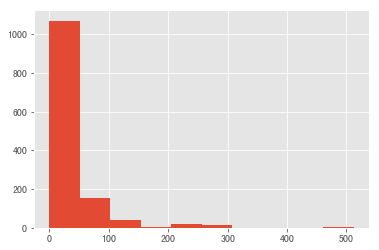

In [10]:
df.Fare.hist()

# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

In [11]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.61452514 0.68156425 0.70224719 0.71910112 0.76271186]
mean CV score: 0.6960299128976762


In [12]:
df_m1 = df.fillna(-2)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.61452514 0.68156425 0.70224719 0.71910112 0.76271186]
mean CV score: 0.6960299128976762


In [13]:
df_m1 = df.fillna(-999)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.61452514 0.68715084 0.66853933 0.70786517 0.74576271]
mean CV score: 0.6847686367800121


In [14]:
df_m1 = df.fillna(999)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.60893855 0.68715084 0.66853933 0.70224719 0.74576271]
mean CV score: 0.6825277228386399


In [15]:
df_m1 = df.fillna(99)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.61452514 0.69273743 0.66292135 0.71910112 0.74576271]
mean CV score: 0.6870095507213844


# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [16]:
# 原值
df_m2 = df.fillna(-1)
train_X = df_m2[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.61452514 0.68156425 0.70224719 0.71910112 0.76271186]
mean CV score: 0.6960299128976762


In [17]:
# MinMax
df_m2 = df.fillna(-1)
df_m3 = MinMaxScaler().fit_transform(df_m2)
train_X = df_m3[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.62011173 0.68715084 0.68539326 0.73595506 0.75706215]
mean CV score: 0.6971346062663598


In [18]:
# StandardScaler
df_m2 = df.fillna(-1)
df_m3 = StandardScaler().fit_transform(df_m2)
train_X = df_m3[:train_num]
estimator = LogisticRegression()
print("each CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5)))
print("mean CV score: {}".format(cross_val_score(estimator, train_X, train_Y, cv=5).mean()))

each CV score: [0.62569832 0.68156425 0.70224719 0.7247191  0.75706215]
mean CV score: 0.6982582017719778
